Решение методом Эйлера: 1.3772833758693874 0.6169954066440165
Решение методом Рунге-Кутты 1.3817721293338137 0.5403025917134935
Решение методом Адамса 1.3816848544271656 0.5402273372942328
Решение методом Рунге-Кутты 4-го порядка: 1.6830031893695985 1.9220480242238187
Решение методом Адамса-Бэшфорта: 1.6835192946626056 1.9225428714352115


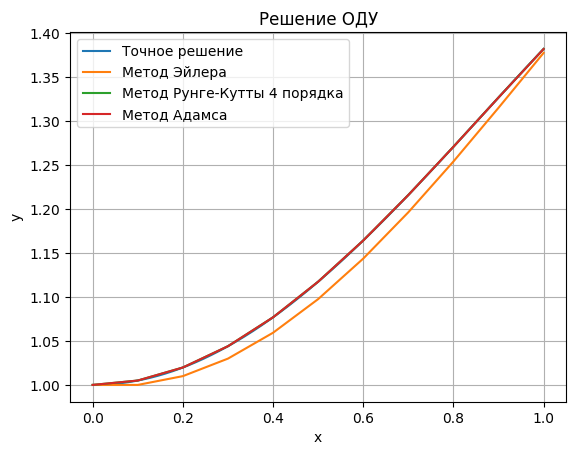

Решение методом Эйлера: 1.3772833758693874
Погрешность по Рунге-Ромбергу:: 0.007528920079502122
Погрешность с точным решением: 0.004489914806648843

Решение методом Рунге-Кутты: 1.3817721293338137
Погрешность по Рунге-Ромбергу: 0.00000116030865
Погрешность с точным решением: 1.1613422226108838e-06

Решение методом Адамса: 1.3816848544271656
Погрешность по Рунге-Ромбергу: 8.67173611718286e-05
Погрешность с точным решением: 8.843624887067136e-05


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp, odeint
from scipy.optimize import fsolve, newton, root_scalar,root, minimize
from scipy.interpolate import interp1d

def euler_method(f, x0, y0, z0, xn, h):
    n = int((xn - x0) / h) + 1
    x = np.linspace(x0, xn, n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0
    for i in range(1, n):
        dy, dz = f(x[i-1], y[i-1], z[i-1])
        y[i] = y[i-1] + h * dy
        z[i] = z[i-1] + h * dz
    return x, y, z

def runge_kutta_method(f, x0, y0, z0, xn, h):
    n = int((xn - x0) / h) + 1
    x = np.linspace(x0, xn, n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0
    for i in range(1, n):
        k1y, k1z = f(x[i-1], y[i-1], z[i-1])
        k2y, k2z = f(x[i-1] + h/2, y[i-1] + h/2 * k1y, z[i-1] + h/2 * k1z)
        k3y, k3z = f(x[i-1] + h/2, y[i-1] + h/2 * k2y, z[i-1] + h/2 * k2z)
        k4y, k4z = f(x[i-1] + h, y[i-1] + h * k3y, z[i-1] + h * k3z)
        y[i] = y[i-1] + h/6 * (k1y + 2*k2y + 2*k3y + k4y)
        z[i] = z[i-1] + h/6 * (k1z + 2*k2z + 2*k3z + k4z)
    return x, y, z

def adams_bashforth_method(f, x0, y0, z0, xn, h):
    n = int((xn - x0) / h) + 1
    x = np.linspace(x0, xn, n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0
    _, y_rk4, z_rk4 = runge_kutta_method(f, x0, y0, z0, x0 + 3 * h, h)
    y[1:4] = y_rk4[1:4]
    z[1:4] = z_rk4[1:4]
    for i in range(3, n - 1):
        y[i+1] = y[i] + h * (55 * f(x[i], y[i], z[i])[0] - 59 * f(x[i-1], y[i-1], z[i-1])[0] + 37 * f(x[i-2], y[i-2], z[i-2])[0] - 9 * f(x[i-3], y[i-3], z[i-3])[0]) / 24
        z[i+1] = z[i] + h * (55 * f(x[i], y[i], z[i])[1] - 59 * f(x[i-1], y[i-1], z[i-1])[1] + 37 * f(x[i-2], y[i-2], z[i-2])[1] - 9 * f(x[i-3], y[i-3], z[i-3])[1]) / 24
    return x, y, z

def runge_romberg(h1, y1, z1, h2, y2, z2, p):
    return y1 + (y1 - y2) / ((h2 / h1) ** p - 1), z1 + (z1 - z2) / ((h2 / h1) ** p - 1)

#Отрезок_нач.условия
x0=0
xn=1

y0=1
z0=0

h=0.1

y_tr = lambda x: x*np.sin(x) + np.cos(x)

def ode_sys(x, y, z):
    dy = z
    dz = 2*np.cos(x) - y
    return dy, dz

# Решение с помощью метода Эйлера
x_euler, y_euler, z_euler = euler_method(ode_sys, x0, y0, z0, xn, h)

# Решение с помощью метода Рунге-Кутты
x_rk4, y_rk4, z_rk4 = runge_kutta_method(ode_sys, x0, y0, z0, xn, h)

# Решение с помощью метода Адамса 4-го порядка
x_adams, y_adams, z_adams = adams_bashforth_method(ode_sys, x0, y0, z0, xn, h)

print("Решение методом Эйлера:", y_euler[-1], z_euler[-1])
print("Решение методом Рунге-Кутты", y_rk4[-1], z_rk4[-1])
print("Решение методом Адамса", y_adams[-1], z_adams[-1])

def ode_sys2(x, y):
    dydx = [y[1], 2 * np.cos(x) - y[0]]
    return dydx

y_0 = [0, 1]

# Решение системы ОДУ методом Рунге-Кутты 4-го порядка
sol_rk4 = solve_ivp(ode_sys2, [x0, xn], y_0, method='RK45', t_eval=np.arange(x0, xn+h, h))

# Решение системы ОДУ методом Адамса-Бэшфорта
sol_adams = solve_ivp(ode_sys2, [x0, xn], y_0, method='BDF', t_eval=np.arange(x0, xn + h, h))

x_rk4_2 = sol_rk4.t
y_rk4_2 = sol_rk4.y[0]
z_rk4_2 = sol_rk4.y[1]
x_adams_2 = sol_adams.t
y_adams_2 = sol_adams.y[0]
z_adams_2 = sol_adams.y[1]

print("Решение методом Рунге-Кутты 4-го порядка:", y_rk4_2[-1], z_rk4_2[-1])
print("Решение методом Адамса-Бэшфорта:", y_adams_2[-1], z_adams_2[-1])

x_tr = np.linspace(x0, xn, 1000)
plt.title("Решение ОДУ")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.plot(x_tr, y_tr(x_tr), label="Точное решение")
plt.plot(x_euler, y_euler, label="Метод Эйлера")
plt.plot(x_rk4, y_rk4, label="Метод Рунге-Кутты 4 порядка")
plt.plot(x_adams, y_adams, label="Метод Адамса")
plt.legend()
plt.show()

h2 = h/2
#Метод Эйлера
_, y_euler2, z_euler2 = euler_method(ode_sys, x0, y0, z0, xn, h2)
y_euler_romberg, z_euler_romberg = runge_romberg(h, y_euler[-1], z_euler[-1], h2, y_euler2[-1], z_euler2[-1], 1)
y_etalon_euler = y_tr(xn)
error_euler_romberg = np.abs(y_euler_romberg - y_euler[-1])
error_euler_etalon = np.abs(y_etalon_euler - y_euler[-1])

print("Решение методом Эйлера:", y_euler[-1])
print("Погрешность по Рунге-Ромбергу::", error_euler_romberg)
print("Погрешность с точным решением:", error_euler_etalon)

#Метод Рунге-Кутты
_, y_rk42, z_rk42 = runge_kutta_method(ode_sys, x0, y0, z0, xn, h2)
y_rk4_romberg, z_rk4_romberg = runge_romberg(h, y_rk4[-1], z_rk4[-1], h2, y_rk42[-1], z_rk42[-1], 4)
y_etalon_rk4 = y_tr(xn)
error_rk4_romberg = np.abs(y_rk4_romberg - y_rk4[-1])
error_rk4_etalon = np.abs(y_etalon_rk4 - y_rk4[-1])

print("\nРешение методом Рунге-Кутты:", y_rk4[-1])
print("Погрешность по Рунге-Ромбергу:", "{:.14f}".format(error_rk4_romberg))
print("Погрешность с точным решением:", error_rk4_etalon)

#Метод Адамса
_, y_adams2, z_adams2 = adams_bashforth_method(ode_sys, x0, y0, z0, xn, h2)
y_adams_romberg, z_adams_romberg = runge_romberg(h, y_adams[-1], z_adams[-1], h2, y_adams2[-1], z_adams2[-1], 4)
y_etalon_adams = y_tr(xn)
error_adams_romberg = np.abs(y_adams_romberg - y_adams[-1])
error_adams_etalon = np.abs(y_etalon_adams - y_adams[-1])

print("\nРешение методом Адамса:", y_adams[-1])
print("Погрешность по Рунге-Ромбергу:", error_adams_romberg)
print("Погрешность с точным решением:", error_adams_etalon)



Численное решение в точке x=0.8: 3.5422446581491727
Погрешность вычислений методом Рунге-Ромберга в точке:  0.000019972372454428
Погрешность вычислений путем сравнения с точным решением:  0.107642464578475039
Численное решение в точке x=0.8: 3.4557645787464497
Погрешность вычислений методом Рунге-Ромберга в точке x=0.8: -0.081338757619113744
Погрешность вычислений путем сравнения с точным решением x=0.8: 0.194122543981197992


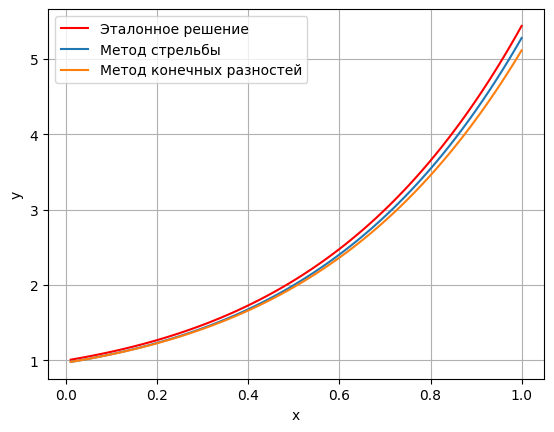

Проверка:
Численное решение в точке x=0.8: 3.5423685303812458
Погрешность вычислений путем сравнения с точным решением x=0.8: 0.107518592346401931


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp, odeint
from scipy.optimize import fsolve, newton, root_scalar,root, minimize
from scipy.interpolate import interp1d

def shooting_method(a,b,z0,eps=1e-6):
    x_span = [a, b]
    x_eval = np.linspace(x_span[0], x_span[1], 100)
    def solve_and_evaluate(y1_guess):
        y_init_guess = [y1_guess, z0]
        sol = solve_ivp(ode, x_span, y_init_guess, method='RK45', t_eval=x_eval,atol=eps)
        return boundary_conditions(sol.y[:, 0], sol.y[:, -1])[1]
    y1_guess = 0.0
    y1_guess_next = 1.0
    tolerance = eps
    max_iterations = 1000
    for _ in range(max_iterations):
        f_y1 = solve_and_evaluate(y1_guess)
        f_y1_next = solve_and_evaluate(y1_guess_next)
        if abs(f_y1_next) < tolerance:
            break
        y1_guess, y1_guess_next = y1_guess_next, y1_guess_next - f_y1_next * (y1_guess_next - y1_guess) / (f_y1_next - f_y1)
    y_init_guess = [y1_guess_next, z0]
    solution = solve_ivp(ode, x_span, y_init_guess, method='RK45', t_eval=x_eval, atol=eps)
    return solution, y1_guess_next

def finite_difference_method(a, b,y0,y1, N):
    h = (b - a) / (N)
    x = np.linspace(a, b, N+1)
    y = np.zeros(N+1)
    y_prime = np.zeros(N+1)
    y[0] = y0
    y_prime[0] = y1
    for i in range(1, N+1):
        y_prime[i] = y_prime[i-1] + h * f(x[i-1], y[i-1], y_prime[i-1])
        y[i] = y[i-1] + h * y_prime[i-1]
    return x, y, y_prime

def runge_romberg_error(h1, y1, h2, y2, p):
    return (y1 - y2) / ((h2 / h1)**p - 1)

def ode(x, y):
    return [y[1], (-(x + 1) * y[0] + (2 * x + 1) * y[1]) / x]

def boundary_conditions(ya, yb):
    return [ya[1]-1, -2* yb[0] + yb[1]]

def f(x, y, y_p):
    return (-(x+1)*y + (2*x + 1)*y_p) / x

a,b=0.01,1
z0=1
point=0.8
solution, y = shooting_method(a,b,z0)
N=100
y_tr = lambda x: np.exp(x)*(x**2+1)
#Решение методом стрельбы
res_sh=np.interp(point, solution.t, solution.y[0])
print(f"Численное решение в точке x={point}: {res_sh}")

#Оценка погрешности
h1=0.01
h2=h1/2
solution2,_ = shooting_method(a,b,z0,eps=1e-3)
res_sh2=np.interp(point, solution2.t, solution2.y[0])
print(f"Погрешность вычислений методом Рунге-Ромберга в точке: ",'{0:.{1}f}'.format(runge_romberg_error(h1,res_sh,h2,res_sh2,p=4),18))
print(f"Погрешность вычислений путем сравнения с точным решением: ",'{0:.{1}f}'.format(np.abs(res_sh-y_tr(point)),18))

#Решение конечно-разностным методом
y0 = y
x_fd,y_fd,_=finite_difference_method(a,b,y0,z0,N)
res_fd=np.interp(point, x_fd, y_fd)
print(f"Численное решение в точке x={point}: {res_fd}")

#Оценка погрешности
N2=50
x_fd2,y_fd2,_ = finite_difference_method(a,b,y0,z0,N2)
res_fd2=np.interp(point, x_fd2, y_fd2)
print(f"Погрешность вычислений методом Рунге-Ромберга в точке x={point}:",'{0:.{1}f}'.format(runge_romberg_error(h1,res_fd,h2,res_fd2,p=4),18))
print(f"Погрешность вычислений путем сравнения с точным решением x={point}:",'{0:.{1}f}'.format(np.abs(res_fd-y_tr(point)),18))

t = np.linspace(a,b, 100)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t, y_tr(t), c="r", label="Эталонное решение")
plt.plot(solution.t, solution.y[0], label="Метод стрельбы")
plt.plot(x_fd, y_fd, label="Метод конечных разностей")
plt.legend()
plt.show()

x = np.linspace(a,b, N)
y_b = np.zeros((2, x.size))

res = solve_bvp(ode, boundary_conditions, x, y_b, tol=1e-6)

print(f"Проверка:");
print(f"Численное решение в точке x={point}:",res.sol(point)[0])
print(f"Погрешность вычислений путем сравнения с точным решением x={point}:",'{0:.{1}f}'.format(np.abs(res.sol(point)[0]-y_tr(point)),18))